In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('present.pkl', 'rb') as f:
    encrypted_present = pickle.load(f)

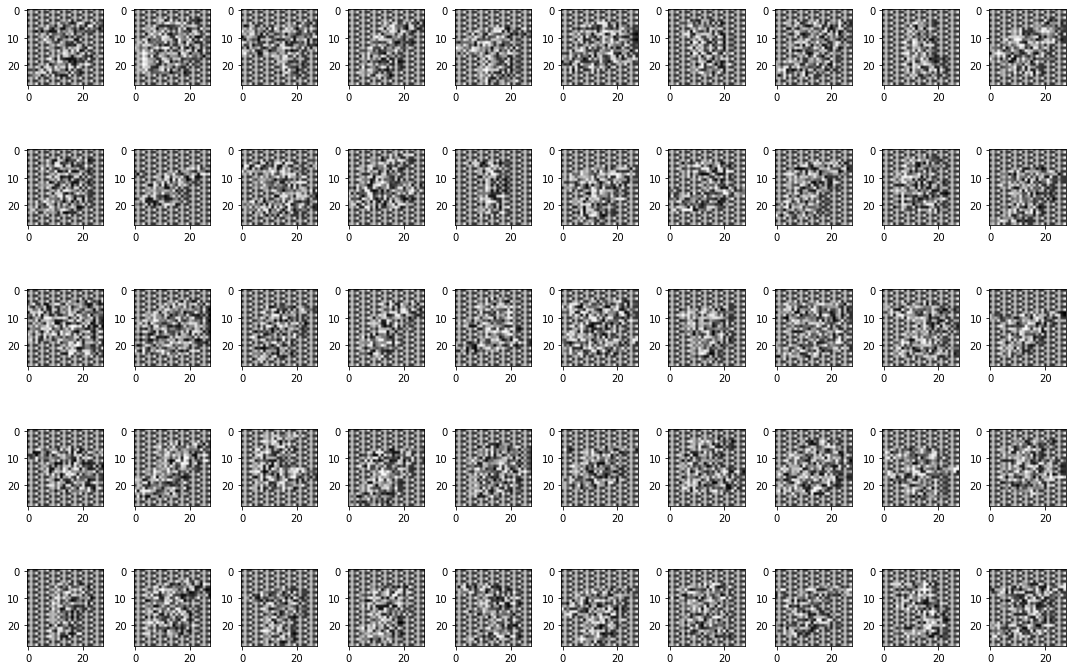

In [3]:
#Plotting Present Encrypted Dataset

num_row = 5
num_col = 10
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(50):
    ax1 = axes1[i // num_col, i % num_col]
    ax1.imshow(encrypted_present[i], cmap='gray')
plt.tight_layout()
plt.show()

In [4]:
#Opening speck dataset

with open('speck.pkl', 'rb') as f:
    encrypted_speck = pickle.load(f)

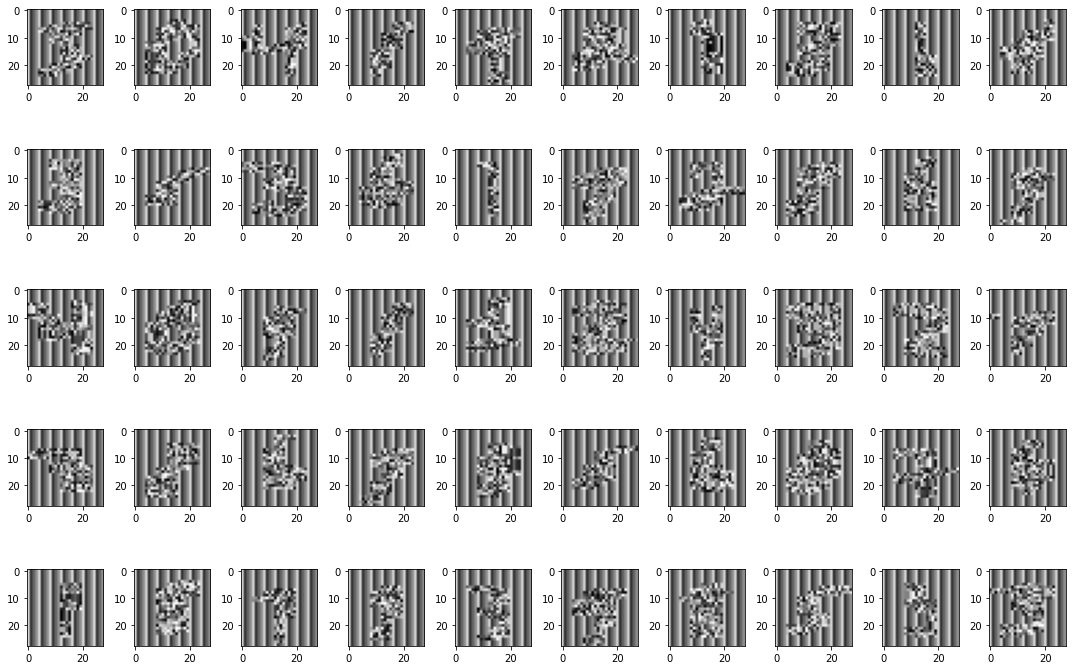

In [5]:
#Plotting Speck Encrypted Dataset

num_row = 5
num_col = 10
# plot images
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(50):
    ax2 = axes2[i // num_col, i % num_col]
    ax2.imshow(encrypted_speck[i], cmap='gray')
plt.tight_layout()
plt.show()

In [5]:
#Importing tensorflow libraries

from tensorflow import keras
# noinspection PyUnresolvedReferences
from tensorflow.keras import layers
from keras.layers import Conv2D
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from keras.layers import MaxPooling2D, Dropout
from keras import Input
from keras import Model

In [54]:
#Creates y with value 0 for present
y = []
for i in range(len(encrypted_present)):
    y.append(0)

In [55]:
#Creates y with value 1 for speck

for i in range(len(encrypted_speck)):
    y.append(1)

In [34]:
#creates x with present and speck.
x = np.concatenate((encrypted_present, encrypted_speck))

In [36]:
#reshape x
trainX = x.reshape((x.shape[0], 28, 28, 1))

In [37]:
#normalize x to (0 - 1)
train_norm = trainX.astype('float32')
train_norm = train_norm / 255.0

In [38]:
#convert y to categorical
#one hot encode target values
trainY = to_categorical(y)

In [ ]:
#We get a final accuracy of ~0.95

In [41]:
#Validating using test dataset generated separately
with open('present_test.pkl', 'rb') as f:
    encrypted_present_test = pickle.load(f)

In [42]:
with open('speck_test.pkl', 'rb') as f:
    encrypted_speck_test = pickle.load(f)

In [77]:
x_test = np.concatenate((encrypted_present_test, encrypted_speck_test))

In [84]:
#Creates y with value 0 for present
y_test = []
for i in range(len(encrypted_present_test)):
    y_test.append(0)

In [85]:
#Creates y with value 1 for speck
for i in range(len(encrypted_speck_test)):
    y_test.append(1)

In [80]:
#reshape x
xTest = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [81]:
#normalize xTest to (0 - 1)
test_norm = xTest.astype('float32')
test_norm = test_norm / 255.0

In [86]:
testY = to_categorical(y_test)

In [90]:
#Compiling Sequential model
from keras import Sequential

#SEQ model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [91]:
#Fitting data
model.fit(train_norm, trainY, validation_data=(test_norm,testY), epochs=3)

Epoch 1/3


2022-06-29 13:29:26.216309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3750/3750 [==============================] - ETA: 0s - loss: 6.5008e-04 - accuracy: 0.9999

2022-06-29 13:30:04.010827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3750/3750 [==============================] - 41s 11ms/step - loss: 6.5008e-04 - accuracy: 0.9999 - val_loss: 0.1136 - val_accuracy: 0.9743
Epoch 2/3
3750/3750 [==============================] - 40s 11ms/step - loss: 9.2422e-09 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 0.8773
Epoch 3/3
3750/3750 [==============================] - 41s 11ms/step - loss: 2.0313e-09 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.8706


In [92]:
#Validating again using test data
score = model.evaluate(test_norm, testY, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.26059290766716003
accuracy= 0.8705500364303589
